In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving glass_train.csv to glass_train.csv


In [ ]:
data_train = pd.read_csv('glass_train.csv')
print(data_train)

          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
..       ...    ...   ...   ...    ...   ...   ...  ...   ...   ...
144  1.51660  12.99  3.18  1.23  72.97  0.58  8.81  0.0  0.24     2
145  1.51839  12.85  3.67  1.24  72.57  0.62  8.68  0.0  0.35     2
146  1.51769  13.65  3.66  1.11  72.77  0.11  8.60  0.0  0.00     3
147  1.51610  13.33  3.53  1.34  72.67  0.56  8.33  0.0  0.00     3
148  1.51670  13.24  3.57  1.38  72.70  0.56  8.44  0.0  0.10     3

[149 rows x 10 columns]


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving glass_test.csv to glass_test.csv


In [ ]:
data_test = pd.read_csv('glass_test.csv')
print(data_test)

         RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
0   1.51643  12.16  3.52  1.35  72.89  0.57  8.53  0.00  0.00     3
1   1.51665  13.14  3.45  1.76  72.48  0.60  8.38  0.00  0.17     3
2   1.52127  14.32  3.90  0.83  71.50  0.00  9.49  0.00  0.00     3
3   1.51779  13.64  3.65  0.65  73.00  0.06  8.93  0.00  0.00     3
4   1.51610  13.42  3.40  1.22  72.69  0.59  8.32  0.00  0.00     3
..      ...    ...   ...   ...    ...   ...   ...   ...   ...   ...
60  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00     7
61  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00     7
62  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00     7
63  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00     7
64  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00     7

[65 rows x 10 columns]


In [ ]:
le = preprocessing.LabelEncoder()
data_train_df = pd.DataFrame(data_train)
data_train_df_encoded = data_train_df.apply(le.fit_transform)

data_test_df = pd.DataFrame(data_test)
data_test_df_encoded = data_test_df.apply(le.fit_transform)

In [ ]:
x_train = data_train_df_encoded.drop(['Type'],axis=1)
y_train = data_train_df_encoded['Type']

x_test = data_test_df_encoded.drop(['Type'],axis=1)
y_test = data_test_df_encoded['Type']

In [ ]:
model = GaussianNB()
nbtrain = model.fit(x_train, y_train)

y_pred = nbtrain.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3076923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix
[[12  2  0  0]
 [ 5  8  0  0]
 [ 6  3  0  0]
 [ 2 27  0  0]]


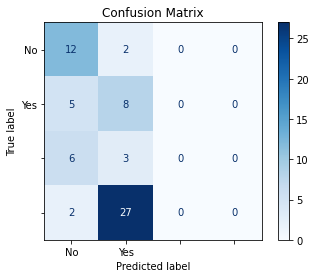

In [ ]:
disp = plot_confusion_matrix(nbtrain, x_test, y_test,
                                 display_labels=['No','Yes'],
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

print('Confusion Matrix')
print(disp.confusion_matrix)

plt.show()
# confusion_matrix(y_test, y_pred, labels=[0, 1])